### 데이터셋 확인


In [1]:
#필요한 라이브러리 호출

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#항상 쓰는 것이 좋음
#seaborn scheme를 세팅하여 graph의 font size를 지정할 필요없다.
#즉, seaborn의 font_scale를 사용하면 편하다

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#데이터 확인

df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')

In [3]:
df_train.head()#train데이터 상위 5개 추출

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
for col in df_train.columns:
    msg = 'coluumn: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum()/ df_train[col].shape[0]))
    print(msg)

coluumn: PassengerId	 Percent of NaN value: 0.00%
coluumn:   Survived	 Percent of NaN value: 0.00%
coluumn:     Pclass	 Percent of NaN value: 0.00%
coluumn:       Name	 Percent of NaN value: 0.00%
coluumn:        Sex	 Percent of NaN value: 0.00%
coluumn:        Age	 Percent of NaN value: 19.87%
coluumn:      SibSp	 Percent of NaN value: 0.00%
coluumn:      Parch	 Percent of NaN value: 0.00%
coluumn:     Ticket	 Percent of NaN value: 0.00%
coluumn:       Fare	 Percent of NaN value: 0.00%
coluumn:      Cabin	 Percent of NaN value: 77.10%
coluumn:   Embarked	 Percent of NaN value: 0.22%


In [7]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


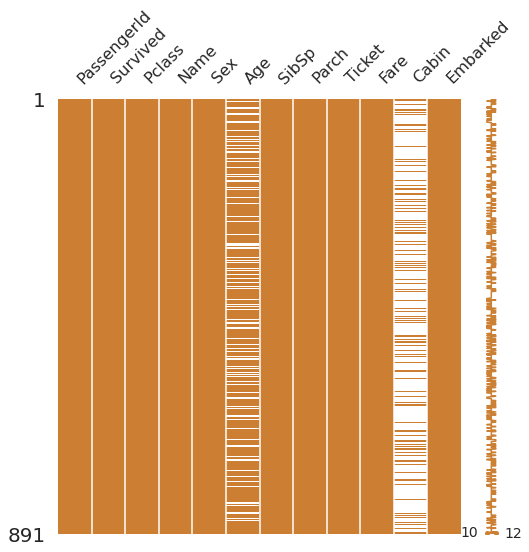

In [8]:
#msno라이브러리를 통해서 null data 시각적으로 보기

msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

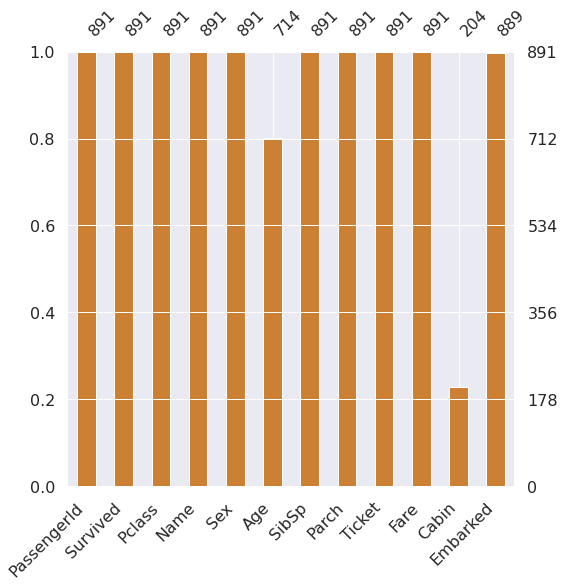

In [9]:
msno.bar(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8,0.5,0.2))

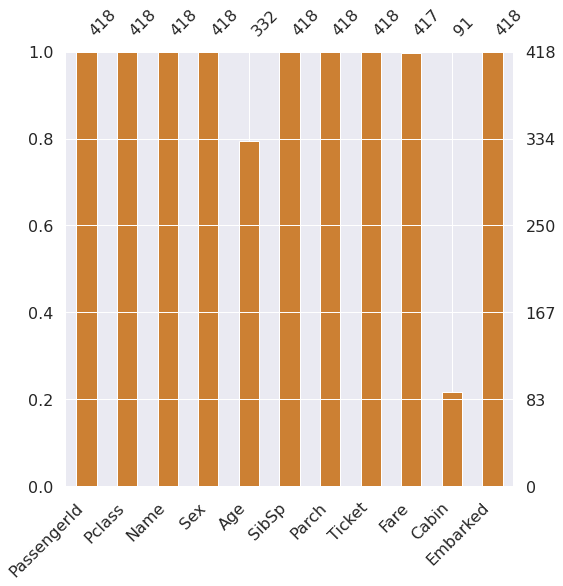

In [10]:
msno.bar(df=df_test.iloc[:, :], figsize = (8,8), color =( 0.8,0.5,0.2))

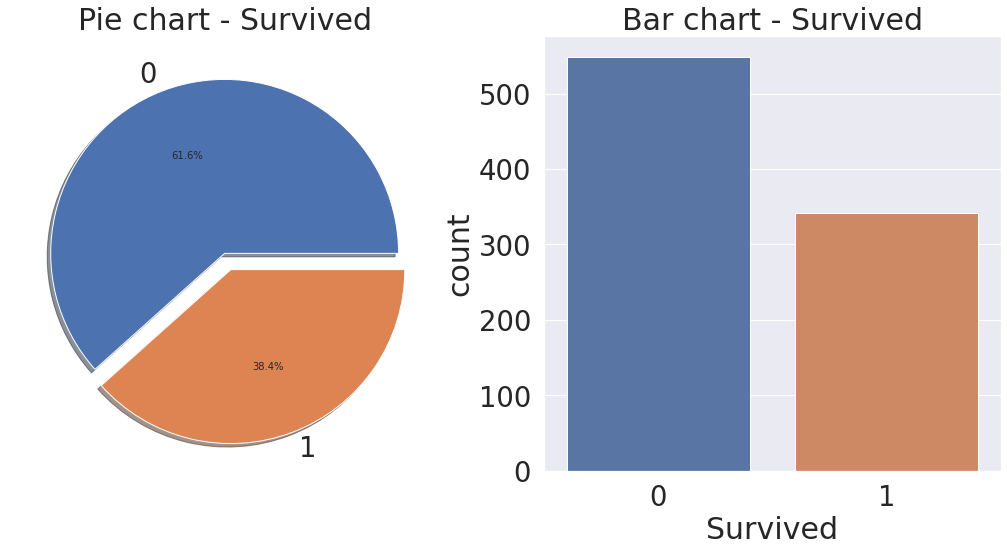

In [11]:
f, ax =  plt.subplots(1, 2, figsize =(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie chart - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Bar chart - Survived')

plt.show()

### EDA

데이터 안에 숨겨진 사실을 시각화를 통해서 찾아야합니다.

시각화 라이브러리는 matplotlib, seaborn, plotly등이 있습니다.


#### 종류

- Pclass

   - 서수형 데이터 타입(ordinal)

   - 카테고리(순서가 있는 데이터 타입)

   - 생존률 차이 살피기

   - 피벗 차트와 유사하기에 pandas dataframe의 groupby이용하면 좋다

   - pivot메소드 사용

   - 각 pclass마다 0,1로 count되고 평균내면 생존률

   - count()를 사용하여 각 class의 몇 명인지 확인도 가능

   - sum을 사용하여 216명 중 생존한 사람 총합

<br>

- Sex

   - 성별로 생존률이 어떻게 다른지 확인

   - pandas groupby와 seaborn countplot사용하여 시각화

<br>

- Both Sex and Pclass

   - Sex, Pclass 두 가지 관하여 생존이 어떻게 달라지는지 확인

   - seaborn의 factorplot사용하면 3차원 그래프 가능

   - 여성이 남성보다 높다

   - 성별 상관없이 클래스가 높을 수록 높다

<br>

- Age

   - Age feature살피기

   - 생존에 따른 Age의 histogram 그려보기

   - 생존자 중 나이가 어린 경우가 많다

   - Class가 높을수록  나이 많은 사람의 비중이 높다

   - 나이대가 변하면서 생존률이 어떻게 되는지 보기

   - 나이 범위를 넓혀가며 생존률 확인

   - 나이가 어릴 수록 생존률이 확실히 높다

   - 나이가 중요한 feature데이터

<br>

- Pclass, Sex, Age

   -  seaborn의 violinplot를 사용하여 나온 거 모두 그리기

   - x축은 우리가 나눠서 보고 싶어하는 case(Pclass, sex)

   - y축은 보고 싶어하는 distribution(Age)

   - Pclass별로 Age의 distribution어떻게 다른지와 생존여부에 따라 구분

   -  Sex, 생존에 따른 distribution이 다른지 보여주는 그래프

   - 생존만 보면 모들 클래스에 나이가 어릴 수록 생존율 높다

   - 여자와 아이의 생존율이 높은 걸로 보아 먼저 챙기는 것을 알 수 있다.

<br>

- Embarked

   - 탑승한 항수

   - 탑승한 곳에 따른 생존률

   - 비슷한 생존률(C가 제일 높음)

   - 모델에 큰 영향을 줄진 미지수 왜냐하면 feature가 두드러지지 않음

   - split를 사용하여 확인

   - Figure(1): 전체적으로 볼 때 S가 가장 많음

   - Figure(2): C와 Q는 남녀 비율이 비슷하고, s는 남자가 더 많다

   - Figure(3): 생존확률이 S의 경우 많이 낮다

   - Figure(4): Class로 split하니 C가 가장 높다(아마도 탑승객이 많아서 인 것 같습니다.)

   - 3은 3rd class가 많아서 생존확률이 낮다


<br>

- Family - SibSp(형제 자매) + Parch(부모, 자녀)

   - SibSp와 Parch 합하면 Family

   - Family로 합쳐서 분석

   - FamilySize와 생존 관계

   - Figure(1): 가족의 크기가 1~11

   - 대부분 1명 혹은 2~4명입니다.

   - Figure(2),(3): 가족의 크기에 따른 생존비교

   - 가족이 4명인 경우 가장 생존확률이 높다
   
   - 가족 수가 많아질수록 작다

   - 즉, 3~4인이 가장 높다

<br>

- Fare

   - 탑승요금

   - contious feature

   - distribution 매우 비대칭

   - 이상치에 대한 과민 반응으로 실체 예측 시 결과는 좋지 않을 것으로 예상됨

   - Fare columns의 log값 취하기

   - python 람다함수 이용(map, log를 편하기 넣기 가능)

   - log를 취한 비대칭성이 많이 사라짐

   - 이런 작업을 통해 모델이 좀 더 좋은 성능을 비춤
   
   - feature engineering작업(모델 성능 향상)

<br>

- Cabin

   - NaN이 약 80%

   - 생존에 미치는 영향은 미미할 것

   - 모델이 포함 안 시킵니다.

<br>

- Ticket

   - NaN이 없다

   - string data이므로 어떤 작업을 통헤야 모델 적용 가능

   - 아이디어 중요

   - ticket number이 다양하므로 어떤 특징을 뽑아내어 생존과 연결시켜야하는지 고려 필수



#### Pclass code


In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
pd.crosstab(df_train['Pclass'], df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


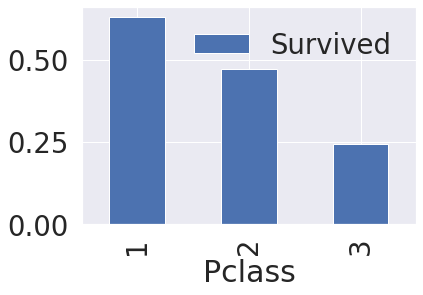

In [16]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
#Pclass가 좋을수록 생존률이 높다

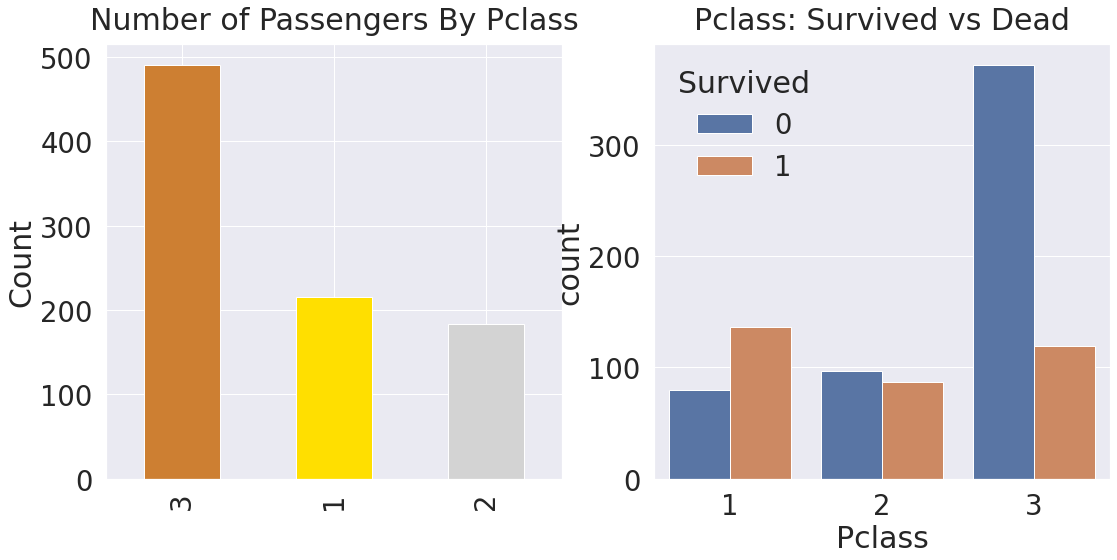

In [17]:
#seaborn의 countplot이용

y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data= df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

#클래스가 높을 수록 생존 확률이 높다.

# 생존에 Pclass가 가장 큰 영향을 끼친다는 인사이트를 얻을 수 있습니다.
# 이를 통해 feature를 사용하는 것이 가장 좋다

#### Sex



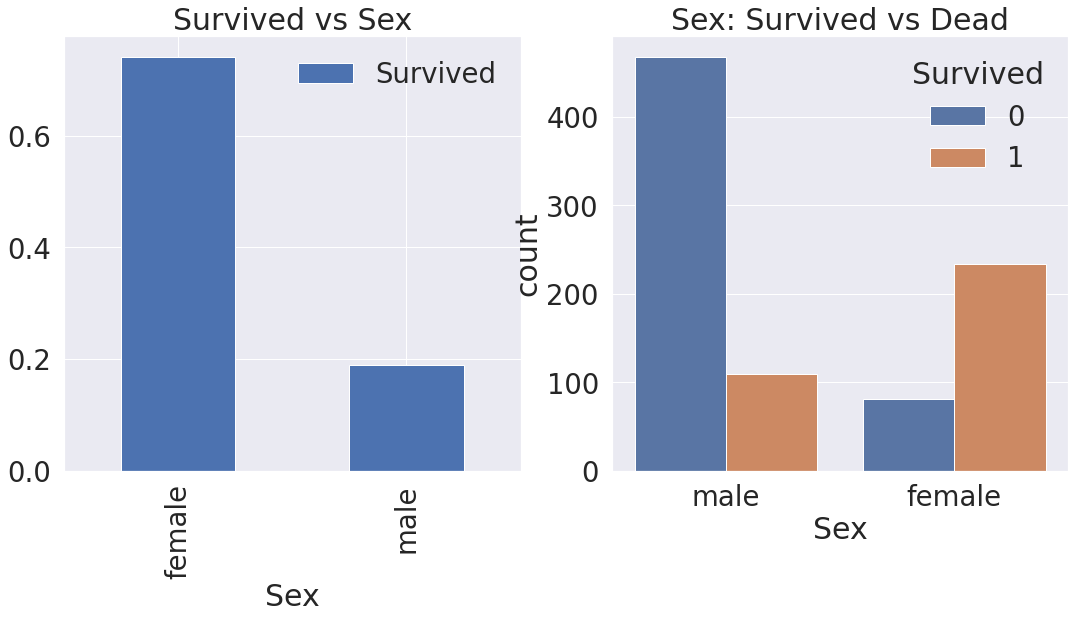

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [19]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


#### Both Sex and Pclass

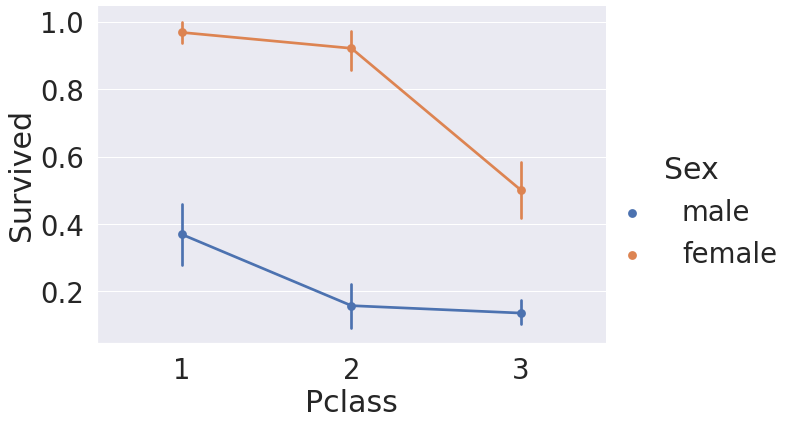

In [21]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data = df_train, size=6, aspect=1.5)

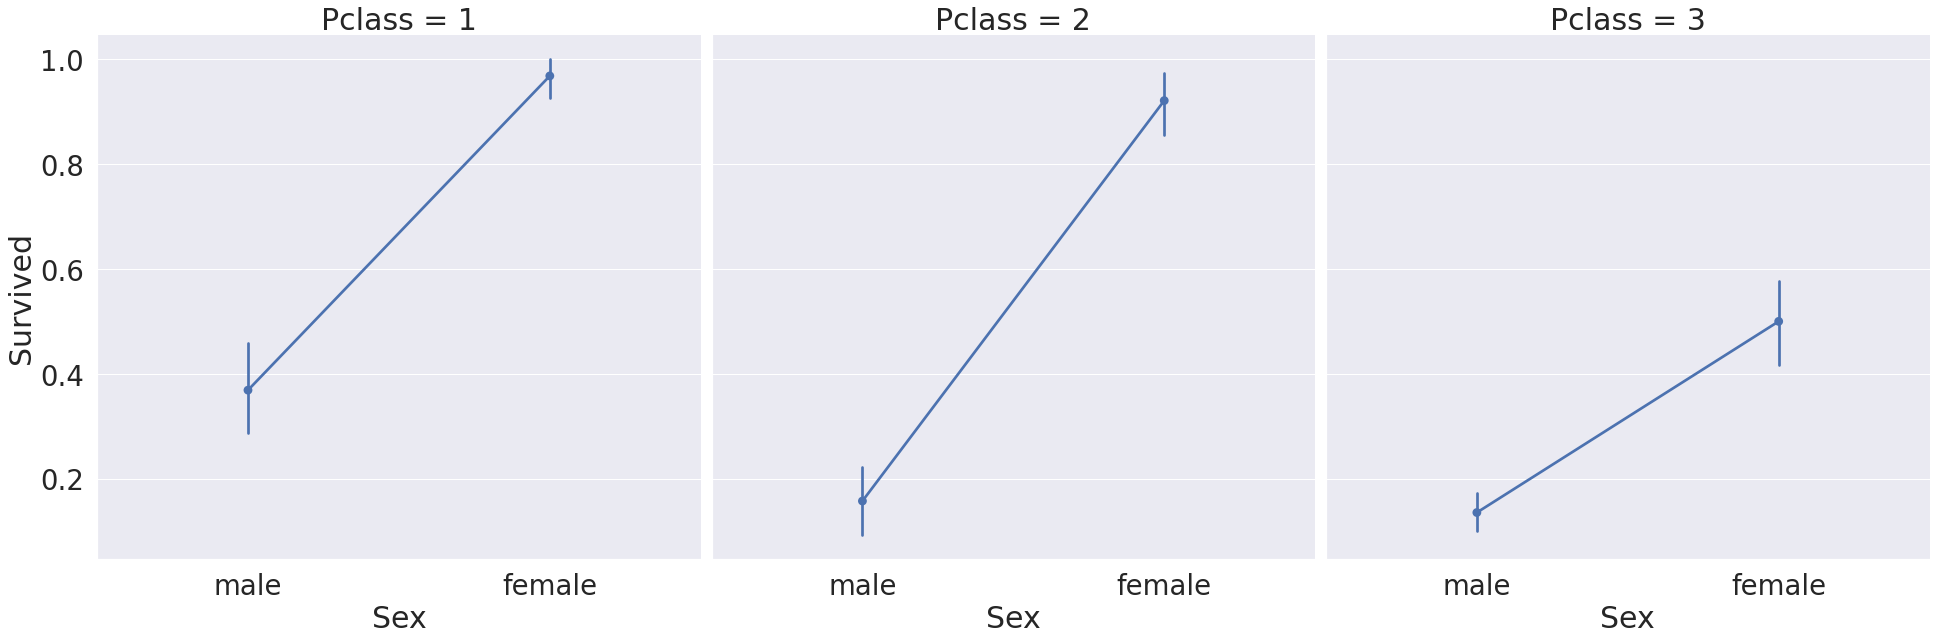

In [22]:
#hue 대신 column사용

sns.factorplot(x='Sex', y='Survived', col='Pclass',
               data=df_train, satureation=.5,
                size=9, aspect=1
               )

#### Age

In [23]:
#Age feature살펴보기
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print("탑승객 평균 나이 : {:.1f} Years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


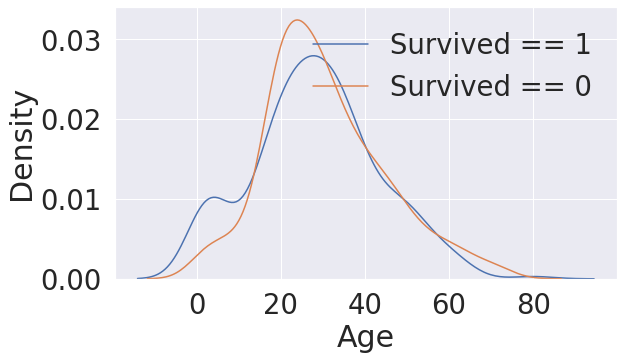

In [24]:
#생존 Age의 historgram 그리기

fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'] )
plt.show()

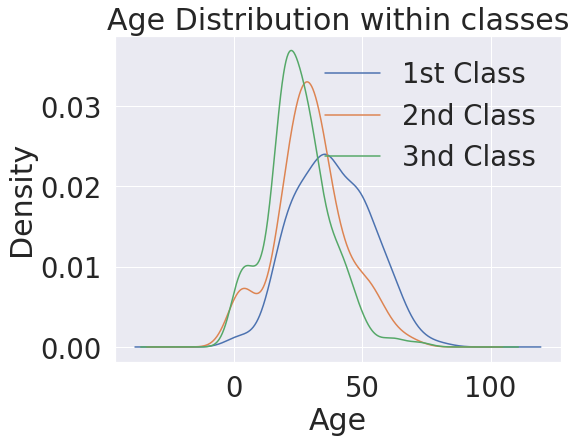

In [25]:
#Age distribution withing classes

plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind ='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3nd Class'])

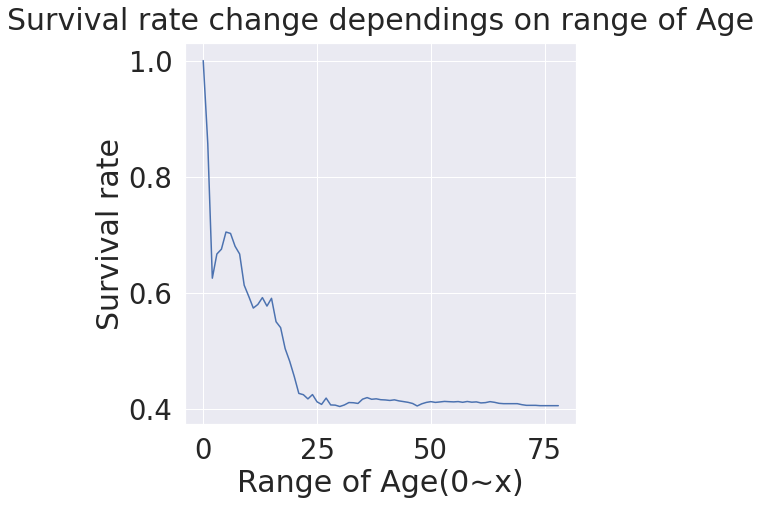

In [26]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change dependings on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

#### Pclass, Sex, Age


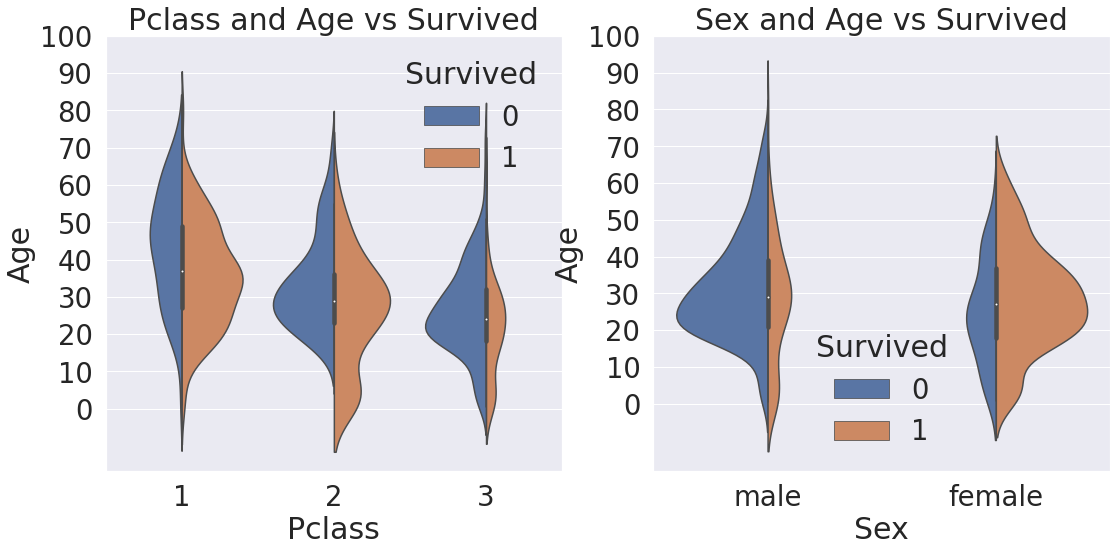

In [27]:
f, ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass", "Age", hue = "Survived", data = df_train, scale = 'count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Embarked

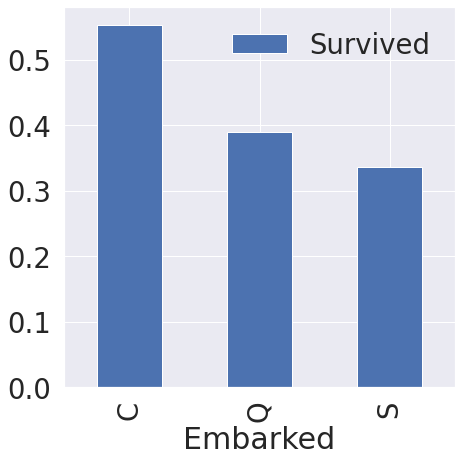

In [28]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

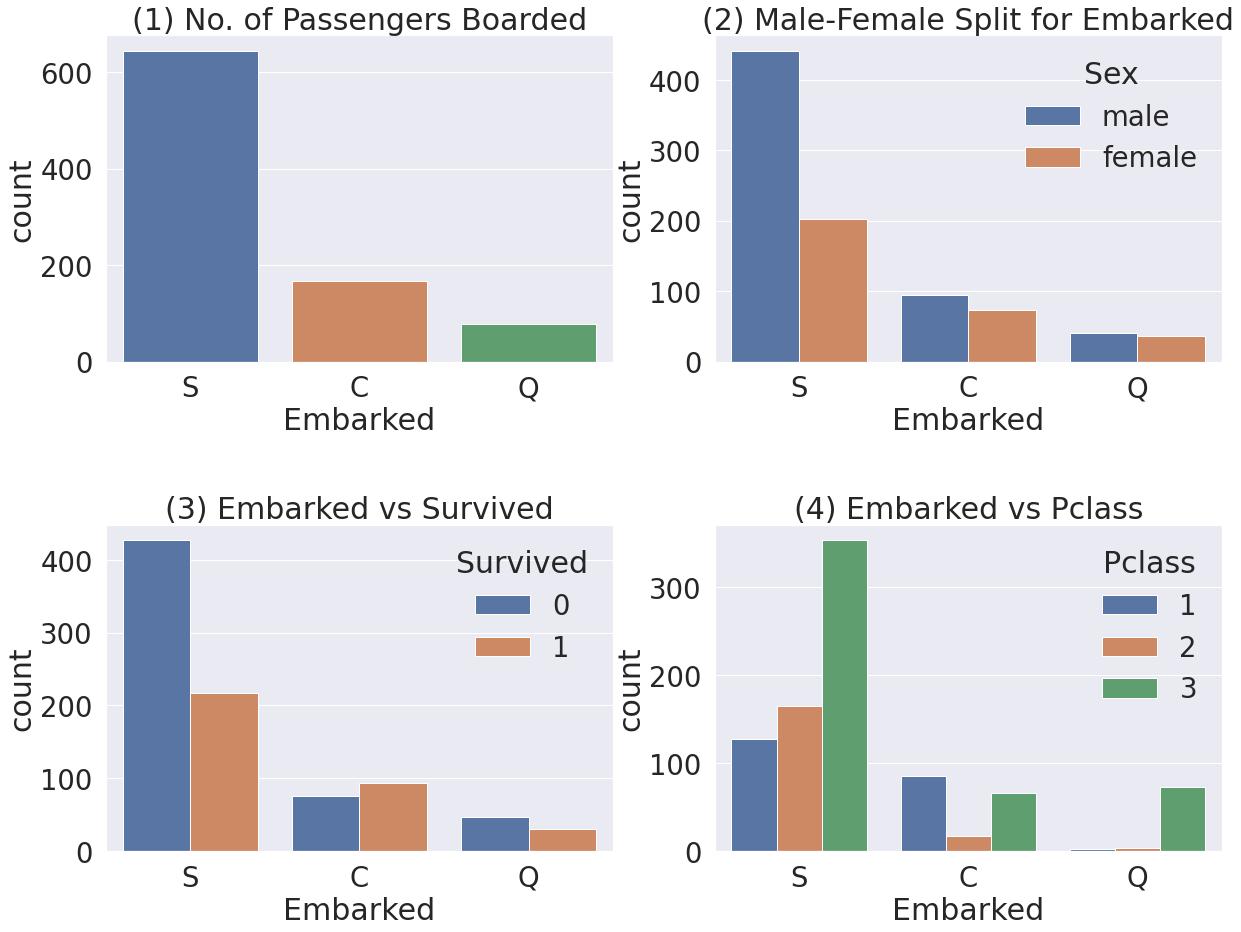

In [29]:
f,ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data = df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue = 'Survived', data = df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data= df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Family~SibSp(형제 자매) + Parch(부모, 자녀)


In [31]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 #자신을 포함
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 #자신 포함

In [33]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family; ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family;  1


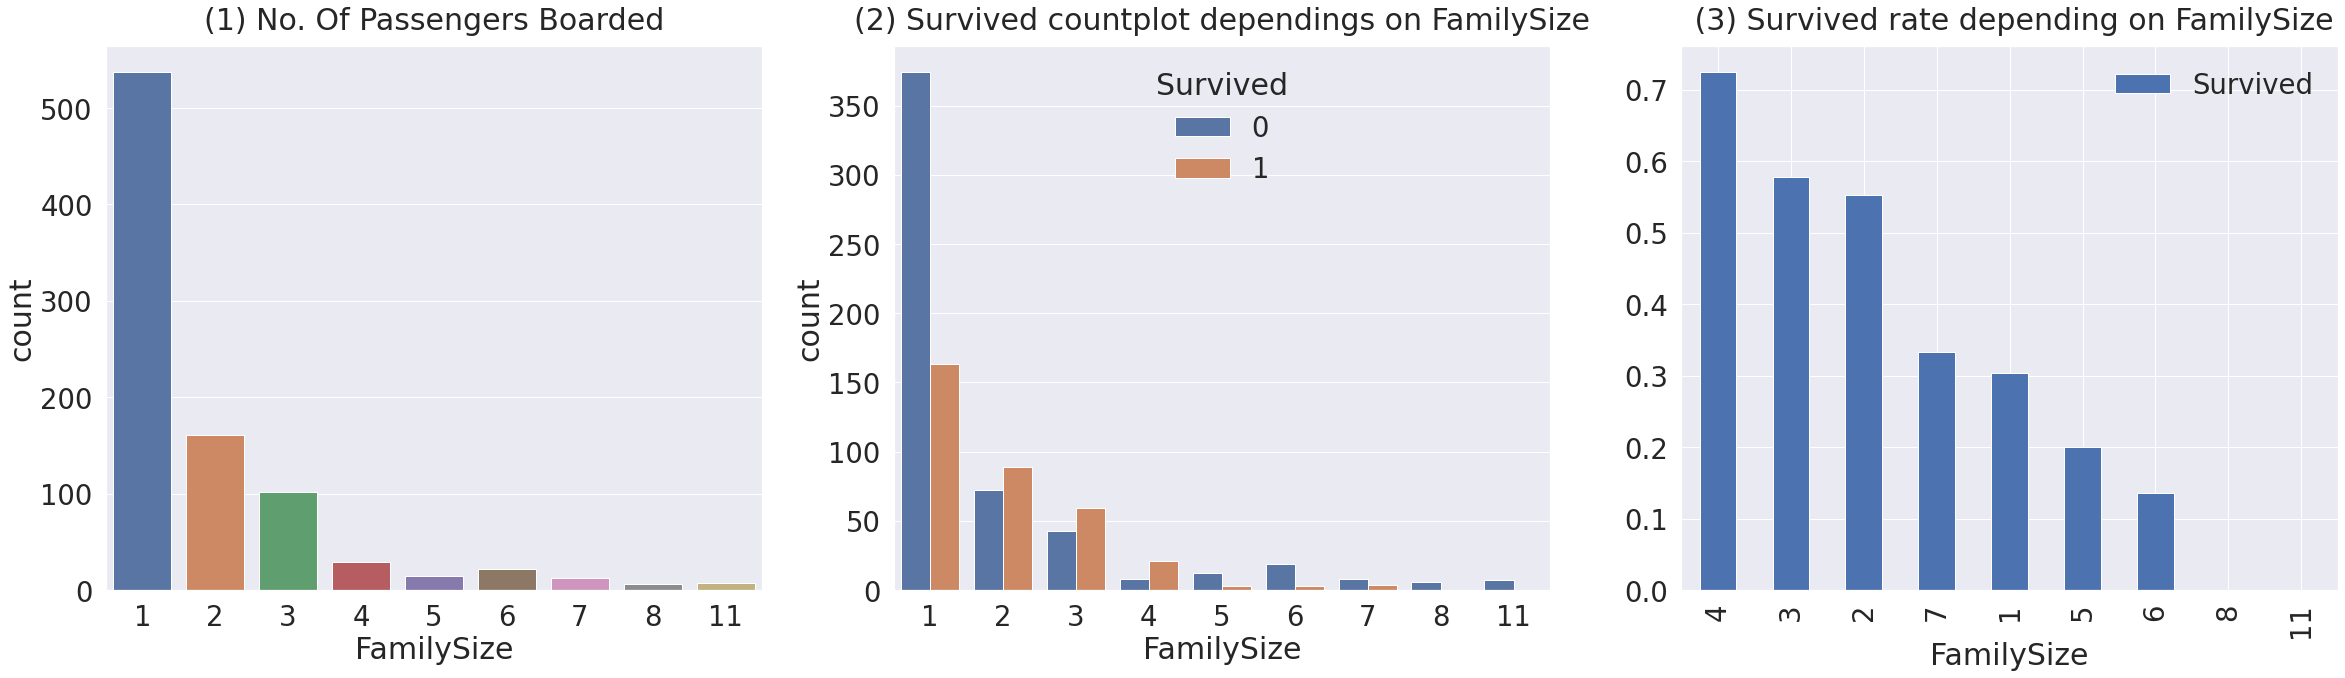

In [34]:
f,ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot('FamilySize', data = df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y= 1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot dependings on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title(' (3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Fare

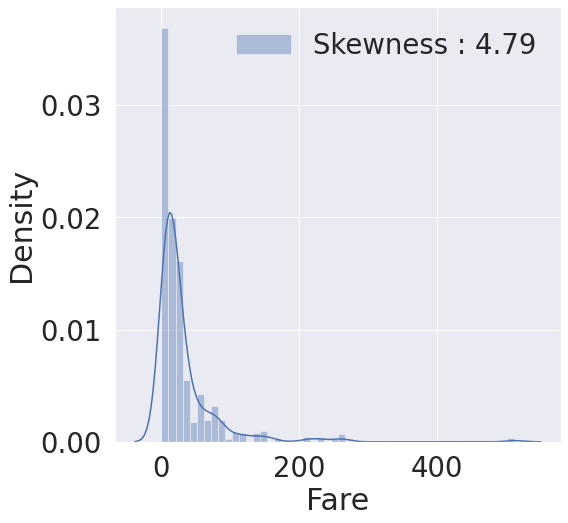

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [36]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

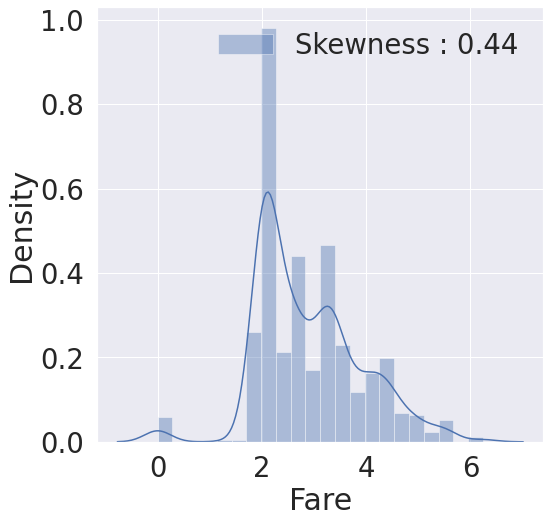

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

#### Cabin


In [38]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


#### Ticket

In [39]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64